In [1]:
import os
from pathlib import Path

import librosa
import librosa.display
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

sb.set()

In [2]:
call_path = Path(os.environ['DATA_DIR']) / 'calls' / 'apus_apus' / '103552.wav'
call, sr = librosa.load(call_path, sr=44100)

# Trim silent edges
call, _ = librosa.effects.trim(call)

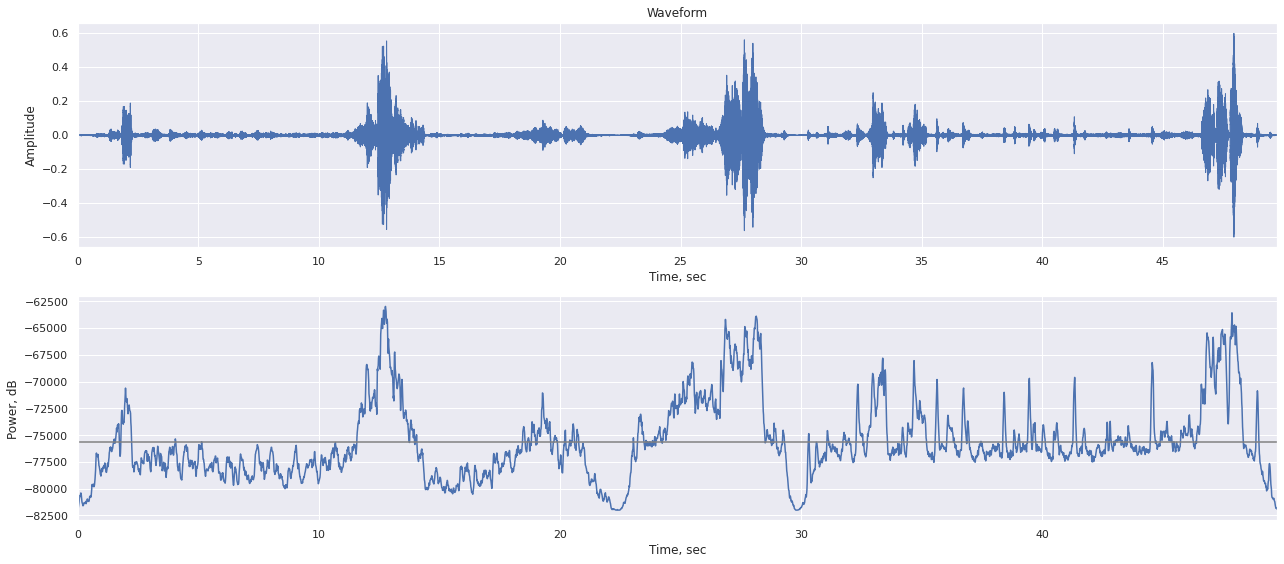

In [3]:
n_fft = 2048
hop_length = 512
S = np.abs(librosa.stft(call, n_fft=n_fft, hop_length=hop_length))
S = librosa.amplitude_to_db(S, ref=np.max)
# Compute total power across all frequencies for every window
S_power = S.sum(axis=0)
times = hop_length * np.arange(len(call) / hop_length + 1) / sr

plt.figure(figsize=(18, 8))

plt.subplot(2, 1, 1)
librosa.display.waveplot(call, sr=sr)
plt.xlabel('Time, sec')
plt.ylabel('Amplitude')
plt.title('Waveform')

plt.subplot(2, 1, 2)
pd.Series(index=times, data=S_power).plot()
plt.axhline(S_power.mean(), color='gray')
plt.xlim(times[0], times[-1])
plt.xlabel('Time, sec')
plt.ylabel('Power, dB')

plt.tight_layout()
plt.show()

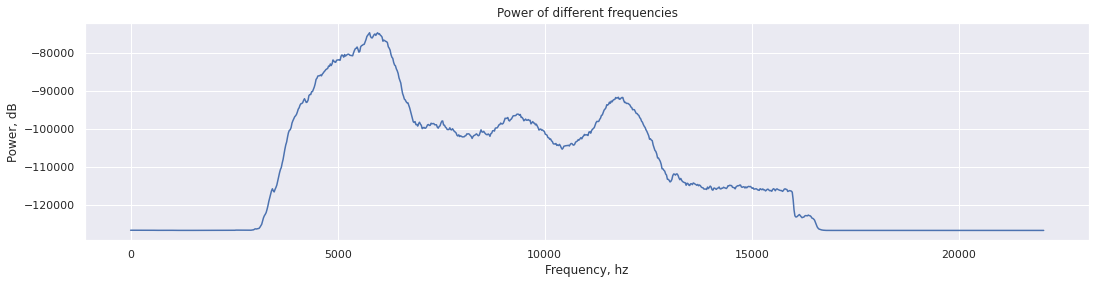

In [4]:
n_fft = 2048
hop_length = 512
S = np.abs(librosa.stft(call, n_fft=n_fft, hop_length=hop_length))
S = librosa.amplitude_to_db(S, ref=np.max)
# Compute total power only on time windows where it's above average power
S_power = S[:, S.sum(axis=0) > S.sum(axis=0).mean()].sum(axis=1)
freqs = sr / n_fft * np.arange(n_fft / 2 + 1)

plt.figure(figsize=(18, 4))
pd.Series(index=freqs, data=S_power).plot()
plt.xlabel('Frequency, hz')
plt.ylabel('Power, dB')
plt.title('Power of different frequencies')
plt.show()